# 3D Bounding Box
## Done by Abhinav and Projit
Abhinav got the coordinates of all the points of the bounding box in the camera plane, and Projit plotted them after bringing them to the image plane.  

Our aim is to draw a bounding box around the image of the car, that has been taken by a self-driving car. This code uses numpy arrays and matplotlib to plot the final points on the image. 

In [2]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt 
import cv2

Camera Cailbration matrix provided to us in K.txt. 

In [3]:
#camera calibration matrix as given 
cal_mat = np.array( [ [7.2153e+02, 0, 6.0955e+02], 
			  		[0, 7.2153e+02, 1.7285e+02],
			  		[0, 0, 1]  ] ) 
cam_inverse = np.linalg.inv(cal_mat)

## Fixing a point as the Origin
The idea is to fix a point on the ground near the wheel of the car. We want this point to be our **origin**. So our frame of reference will be with respect to this origin. We then get the pixel coordinates of this point by plotting the image either in python, or in matlab using `imtool` and then by moving the cursor around to our origin. We get our origin coordinates as (825, 308)

In [5]:
#found using imtool in matlab 
pixels = np.array( [ [825, 308, 1] ] ) 

## Converting to camera coordinates
We multiply our origin by the inverse of the calibration matrix 'K' to go to the camera plane! We notice that the z coordinate is 1, that is, there is no depth. Hence we use the equation derived from the focal length principles: 

z = (fy.y) / (Y-offset)

y=1.65m , the height of the camera above the plane. We get fy and offset value from the calibration matrix.

In [8]:
temp = np.matmul(cam_inverse, pixels.transpose())
print("Origin coordinates\n", temp); #temp is coordinates in camera plane

fy = 7.2153e+02
Y = 312
y = 1.65

z = (fy*y)/(Y - 1.7285e+02)
print("z = ", z);

temp = z * temp
# print(temp);#camera cooridnates of origin

Origin coordinates
 [[0.29860158]
 [0.1873103 ]
 [1.        ]]
z =  8.555691699604743


## Getting the other 7 coordinates
We know the height, width, and length of the car. Our frame of reference is:

X axis along the width of the car

Y axis along ther NEGATIVE of the height of the car

Z axis along the length of the car

Using this frame, we calculate the coordinates of the other points of the bounding box. 

flb stands for front, left, bottom, nrt for near, right, top and so on..

In [9]:
X = temp[0]
Y = temp[1]
Z = temp[2]

height = 1.38
width = 1.51
length = 4.10

flb = np.array([X, Y, Z])
frb = np.array([X+ width, Y, Z])
flt = np.array([X, Y-height, Z])
frt = np.array([X+width, Y-height, Z])

nlb = np.array([X, Y, Z+length])
nrb = np.array([X+width, Y, Z+length])
nlt = np.array([X, Y-height, Z+length])
nrt = np.array([X+width, Y-height, Z+length])

## Reverting back to image plane
We multiply by K again to get the coordinates of the points in the image plane.

In [10]:
flb2 = np.matmul(cal_mat, flb)
frb2 = np.matmul(cal_mat, frb)
flt2 = np.matmul(cal_mat, flt)
frt2 = np.matmul(cal_mat, frt)
nlb2 = np.matmul(cal_mat, nlb)
nrb2 = np.matmul(cal_mat, nrb)
nlt2 = np.matmul(cal_mat, nlt)
nrt2 = np.matmul(cal_mat, nrt)

We divide by the last row (because homogeneous coordinates)

In [11]:
flb2 = flb2/flb2[2]
frb2 = frb2/frb2[2]
flt2 = flt2/flt2[2]
frt2 = frt2/frt2[2]
nlb2 = nlb2/nlb2[2]
nrb2 = nrb2/nrb2[2]
nlt2 = nlt2/nlt2[2]
nrt2 = nrt2/nrt2[2]

Coordinates of some of the points:

In [14]:
print(flb2)
print(frb2)
print(flt2)
print(frt2)

[[825.]
 [308.]
 [  1.]]
[[952.34333333]
 [308.        ]
 [  1.        ]]
[[825.  ]
 [191.62]
 [  1.  ]]
[[952.34333333]
 [191.62      ]
 [  1.        ]]


## Plotting the points

We create groups of points, which are to be connected. Each point can be connected to only 3 other points. And there are 8 points. So we have 4 groups of 4 points each, and a line must be drawn between them. We run a loop accordingly, and draw the lines.

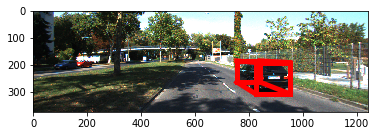

In [15]:
connect = [(flb2, frb2, flt2, nlb2), (frt2, flt2, frb2, nrt2), (nlt2, flt2, nlb2, nrt2), (nrb2, nrt2, nlb2, frb2)]

def main():
    image = plt.imread("image.png")

    for group in connect:
        pt1 = group[0]
        for i in range(1,4):
            pt =  group[i]
             
            plt.plot([pt1[0], pt[0]], [pt1[1], pt[1]], c='r', linewidth = 5)

    plt.imshow(image)
    plt.show()

main()

This is how the image appears when zoomed in. This can be obtained by running the python file 'q2.py' directly using `python3 q2.py` and using the magnifier tool to zoom into the image to view the plotted points clearly. 
![original](ss2.png)